# Developing a Machine Learning Classifier for Predicting Diabetes Diagnosis
Machine Learning for Predictive Analytics CMPU4011 - CA1 (20%)

**Student**: Lovely Fernandez C20305696
**Date**: 2nd December, 2024


**Task Description**

In this assignment you will develop a classifier that uses data to predict if a patient has diabetes. 
The classifier model has to be one of those studied in this course.  
Please include at least two different classifiers in your code and documentation. 
The data is available on Kaggle, and also uploaded on Brightspace (diabetes.csv):  
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


## Data Overview and Cleaning

**Context of Dataset**

The objective of retrieving the dataset is to study and predict the likelihood having diabetes. 

Target group: Females (21years~) 
Source: National Insititute of Diabetes and Digestive and Kindey Disease

Predictor Variables:
- Number of pregnancies
- Glucose levels
- Bloodpressure
- Skin Thickness
- Insulin
- BMI
- Diabetes Pedigree Function
- Age

Target Variables: Outcome (True(1)/False(0))


### Importing Dataset
Using the dataset provided by Kaggle: diabetes.csv

In [278]:
import pandas as pd

dataset = "diabetes.csv"

# defining feature names
features = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
    "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

# read and print data
data = pd.read_csv(dataset, header = 0)

# check if data loaded correctly
print(data.info()) 
data.head(10) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Cleaning Dataset
The dataset has no missing values but is likely replaced by "0". These need to be replaced (NaN) as it may affect the outcome of the model during training/testing.
Decided to replace NaN variables with median to reduce error probability on model as it is less sebsitive to extreme values in comparison to average. I did not remove data as 50% of the dataset has NaN values.

Features to check: Glucose, Bloodpressure, SkinThickness, Insulin, BMI

In [279]:
import numpy as np

# replacing '0' for missing values as NaN
columns_NaN = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_NaN] = data[columns_NaN].replace(0, np.nan)

# replacing NaN values with the median of the respective column
data[columns_NaN] = data[columns_NaN].apply(lambda col: col.fillna(col.median()))

data.head(20)  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


### Split dataset into Train and Test sets


In [280]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# splitting features (X) and target variables (y)

X = data.drop('Outcome', axis = 1) # features
y = data['Outcome'] # target

# splitting datset for training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# combining training features and target
train_data = X_train.copy()
train_data['Outcome'] = y_train # for training
train_data_list = train_data.values.tolist()  

# combining testing features and target
test_data = X_test.copy()
test_data['Outcome'] = y_test # for testing
test_data_list = test_data.values.tolist()  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 1. KNN Algorithm

In [281]:
# defining similarity using euclidead to find distances
import numpy as np

def euclidean(instance1, instance2):
    distance = 0
    
    for i in range(len(instance1)):
        distance += (instance1[i] - instance2[i]) ** 2

    return np.sqrt(distance)


In [282]:
from collections import Counter

# implementing KNN (get_distances and knn_estimate)
# get_distances/2
def get_distances(dataset, query):
    distances = []

    # convert dataset to NumPy array
    dataset_values = dataset.values  
    query_values = query.to_numpy()
    
    for i, instance in enumerate(dataset_values):
        distance = euclidean(instance[:-1], query_values)  
        distances.append((distance, i)) 

    distances.sort(key=lambda x: x[0]) # sorts by distanc
    return distances

# get_distances/3
def knn_estimate(dataset, query, num_neighbours=3):
    distances = get_distances(dataset, query)  
    
    nearest_neighbors = [dataset.iloc[i, -1] for _, i in distances[:num_neighbours]]  # Get the target labels of nearest neighbors
    most_common_target = Counter(nearest_neighbors).most_common(1)[0][0]  # Get the most common label
    return most_common_target



In [283]:
actual_labels = []
predicted_labels = []

# predicting outcome of test data based on training data
for i, row in test_data.iterrows():
    query = row[:-1]  # extract the features (exclude the label if any)
    
    # predict the label for the query point using KNN
    predicted_label = knn_estimate(train_data, query, num_neighbours=3)
    
    # adding actual label and predicted label to the lists
    actual_labels.append(row['Outcome'])
    predicted_labels.append(predicted_label)

In [284]:
# calculate accuracy
correct_predictions = sum(1 for actual, predicted in zip(actual_labels, predicted_labels) if actual == predicted)
accuracy = correct_predictions / len(actual_labels)

# print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 67.97%


### Comparing KNN Algorithm using ScikitLearn

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

knn

KNeighborsClassifier(n_neighbors=3)

In [286]:
accuracy = knn.score(X_test, y_test)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 67.97%


## Implementing ID3 Algorithm


In [287]:
# Entropy Function: Takes a list of values and returns the entropy

def entropy(values):
    from math import log
    
    # store the count of each value
    value_counts = {}
    entropy = 0.0
    
    # count frequency of each value in the dataset
    for value in values:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
    
    # entropy
    for count in value_counts.values():
        p = count / len(values)  # probability of each value
        entropy -= p * log(p, 2)  
    
    return entropy


In [288]:
# testing of entropy function
# predicted outcome 0.4394969869215134
# animalset1 = ['cat', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse']
# print(entropy(animalset1))

# calculating entropy for Outcome column of dataset
target_entropy = entropy(data['Outcome'])
print("Entropy of Outcome:", target_entropy)

Entropy of Outcome: 0.9331343166407831


In [289]:
# Extract Feature Function: Extracting a column of values from dataset

def get_feature(featureindex=-1, dataset=None):
    featureCol = []

    for i in range(0, len(dataset)):
        featureCol.append(dataset[i][featureindex])
    return(featureCol)

In [290]:
# testing Extract Feature
target_col = get_feature(featureindex=len(train_data.columns) - 1, dataset=train_data_list)
print("Target Column (first 10 rows):", target_col[:10])  # first 10
print("Entropy of Outcome (train data):", entropy(target_col))


Target Column (first 10 rows): [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
Entropy of Outcome (train data): 0.9341511828968383


In [291]:
# partitioning dataset by a feature and calculating remaining entropy

# group rows into partitions based on the values of a feature
def create_partitions(featureIndex=-1,dataset=None):
    partitions = {}
    for row in dataset:
        feature_value = row[featureIndex]

        if feature_value not in partitions:
            partitions[feature_value] = []
            
        partitions[feature_value].append(row)

    return partitions

# computes the remainder (of entropy) of a dataset partitioned into subsets
def calculate_remainder(partitions):
    remainder = 0
    
    # assuming target variable is last in the col (right)
    example_instance = (next(iter(partitions.values())))[0]
    target_index = len(example_instance)-1
    
    # find weight of entropy in each partition
    # find total number of examples (denominator in the weight term - size_dataset)
    size_dataset = 0
    
    for k in partitions.keys():
        size_dataset = size_dataset + len(partitions[k])
    
    # calculating remaining entropy
    for k in partitions.keys():
        # entropy for each partition
        temp_partition = partitions[k]
        targetColumn = get_feature(target_index, temp_partition)
        ent = entropy(targetColumn)

        # weight for each partition
        weight = len(temp_partition)/size_dataset

        # sum of weighting remaining entropy for each partition
        remainder = remainder + (weight * ent)

    return(remainder)

In [292]:
# testing create_partitions and calculate_reminder

glucose_partitions = create_partitions(featureIndex=1, dataset=train_data_list)
print("Number of partitions:", len(glucose_partitions))

for key, partition in list(glucose_partitions.items())[:5]:
    print(f"Glucose Value: {key}, Number of Examples: {len(partition)}")

glucose_remainder = calculate_remainder(glucose_partitions)
print("Remaining Entropy of Glucose Partition:", glucose_remainder)


Number of partitions: 127
Glucose Value: 95.0, Number of Examples: 10
Glucose Value: 105.0, Number of Examples: 9
Glucose Value: 135.0, Number of Examples: 1
Glucose Value: 131.0, Number of Examples: 3
Glucose Value: 103.0, Number of Examples: 6
Remaining Entropy of Glucose Partition: 0.5599088226513177


In [293]:
# Calculating Information Gain to determine the best feature to split on

def information_gain(featureindex=-1, dataset=[]):
    # extract the target values (last column) 
    target_values = [row[-1] for row in dataset]
    
    # calculate entropy of target values
    target_entropy = entropy(target_values)

    # partition dataset based on specified feature (using create_partitions)
    partitions = create_partitions(featureindex, dataset)
    
    # weighted entropy of partitions (sum of entropy - each partition)
    partition_entropy = sum(
        (len(partition) / len(dataset)) * entropy([row[-1] for row in partition])
        for partition in partitions.values()
    )
    
    return target_entropy - partition_entropy



In [294]:
# information gain of all descriptive features (Train data)

for i in range(0, len(train_data.columns) - 1):
    
    ig = information_gain(i, train_data_list)
    print("Information gain of " + X_train.columns[i] + ": " + str(ig))


Information gain of Pregnancies: 0.06872070369925143
Information gain of Glucose: 0.3742423602455208
Information gain of BloodPressure: 0.08285520131893342
Information gain of SkinThickness: 0.09954656355765956
Information gain of Insulin: 0.32225878962360877
Information gain of BMI: 0.416894752543128
Information gain of DiabetesPedigreeFunction: 0.6989967490517075
Information gain of Age: 0.18195171119584463


In [295]:
# creating a decision tree representation
class tree_node:
    def __init__(self, feature_name='', feature_index=-1, branches=None, prediction=None):
        self.feature_name = feature_name # stores name of feature tested at this node
        self.feature_index = feature_index # stores index of feature col
        self.branches = branches if branches else {} # dictionary object where each key = level of test feature and value 
        self.prediction = prediction   # stores the target level returned as a prediction by the node


In [296]:
# implenting ID3 Algorithm

# check that all instances in the list are the same
def all_same(D = []):

    if len(D) > 0:
        target_index = len(D[0])-1
        target_column = get_feature(target_index, D)

        if entropy(target_column) == 0:
            return True

    return False

# determine most frequent target value
def majority_target_level(D):
    target_values = [row[-1] for row in D]
    return max(set(target_values), key=target_values.count)

In [297]:
def id3(d, D, parentD, feature_names):
    # same target value, create a leaf node with the target value
    if all([row[-1] == D[0][-1] for row in D]):
        return tree_node(prediction=D[0][-1])  # same target value

    # no features left to split on, return the majority class
    if len(d) == 0:
        return tree_node(prediction=majority_target_level(parentD))  # mjority class as prediction

    # best feature to split on (highest information gain)
    best_feature = None
    best_info_gain = -float('inf')  # start with low information gain
    best_feature_index = -1
    for i, feature in enumerate(d):
        info_gain = information_gain(i, D)  # calculate information gain for feature
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = feature
            best_feature_index = i

    # create a tree node for the best feature
    node = tree_node(feature_name=best_feature, feature_index=best_feature_index)

    # partition the dataset based on the best feature
    partitions = create_partitions(best_feature_index, D)

    # remove the best feature from the list of features to be split on
    d_new = [f for f in d if f != best_feature]

    # recursively build the tree for each partition
    for value, subset in partitions.items():
        if len(subset) == 0:
            # subset is empty - assign majority class of parent dataset
            node.branches[value] = tree_node(prediction=majority_target_level(parentD))
        else:
            # else-> build the child node
            node.branches[value] = id3(d_new, subset, D, feature_names)

    return node


In [298]:
# Predict function: recursively predicts the target value for an instance using the trained decision tree

def predict(tree, instance):
    # node is a leaf (prediction is not None), return the prediction
    if tree.prediction is not None:
        return tree.prediction
    
    # get the value of the feature at the current node
    feature_value = instance[tree.feature_index]

    # feature value exists in the branches of the node, recurse to apppropriate branch
    if feature_value in tree.branches:
        return predict(tree.branches[feature_value], instance)
    else: # feature value does not exist in the branches, return the majority class from the dataset
        return majority_target_level([instance])

In [299]:
feature_names = X_train.columns.tolist()
tree = id3(feature_names, train_data_list, train_data_list, feature_names)


In [300]:
from sklearn.metrics import accuracy_score, classification_report  

# using test set
y_pred = [predict(tree, instance) for instance in test_data_list]

# accuracy
accuracy = accuracy_score(y_test, y_pred)  # calculates accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 85.71%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       151
           1       0.78      0.82      0.80        80

    accuracy                           0.86       231
   macro avg       0.84      0.85      0.84       231
weighted avg       0.86      0.86      0.86       231



### Using Tree to making prediction

In [301]:
def predict(tree, instance):
    # if the node is a leaf node, return the prediction
    if tree.prediction is not None:
        return tree.prediction

    # follow branch corresponding to the value of the instance's feature
    feature_value = instance[tree.feature_index]
    if feature_value in tree.branches:
        return predict(tree.branches[feature_value], instance)
    else:
        # value is missing or doesn't match any branch, return the majority class
        return majority_target_level([instance])

In [302]:
# predicting the target values for each instance in the test set
y_pred = [predict(tree, instance) for instance in test_data_list]

# accuracy
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))  # classification report

Accuracy: 85.71%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       151
           1       0.78      0.82      0.80        80

    accuracy                           0.86       231
   macro avg       0.84      0.85      0.84       231
weighted avg       0.86      0.86      0.86       231



### Comparing using ScikitLearn

In [303]:
from sklearn.tree import DecisionTreeClassifier  

# initialise decision tree classifier 
diabetes_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# fit the model to the training data (X_train, y_train)
diabetes_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [304]:
from sklearn.tree import export_text 

# get the feature names from the X 
feature_names = X.columns

# print decision tree
tree_rules = export_text(diabetes_clf, feature_names=list(feature_names))
print(tree_rules)


|--- Glucose <= 154.50
|   |--- Age <= 28.50
|   |   |--- Glucose <= 127.50
|   |   |   |--- BMI <= 49.10
|   |   |   |   |--- BMI <= 31.40
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  31.40
|   |   |   |   |   |--- class: 0
|   |   |   |--- BMI >  49.10
|   |   |   |   |--- class: 1
|   |   |--- Glucose >  127.50
|   |   |   |--- SkinThickness <= 27.50
|   |   |   |   |--- Glucose <= 129.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  129.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- SkinThickness >  27.50
|   |   |   |   |--- BloodPressure <= 61.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- BloodPressure >  61.00
|   |   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.95
|   |   |   |--- Age <= 29.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  29.50
|   |   |   |   |--- Glucose <= 133.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Glucose >  133.00
|   |   |   |   |   |--- class: 0
|

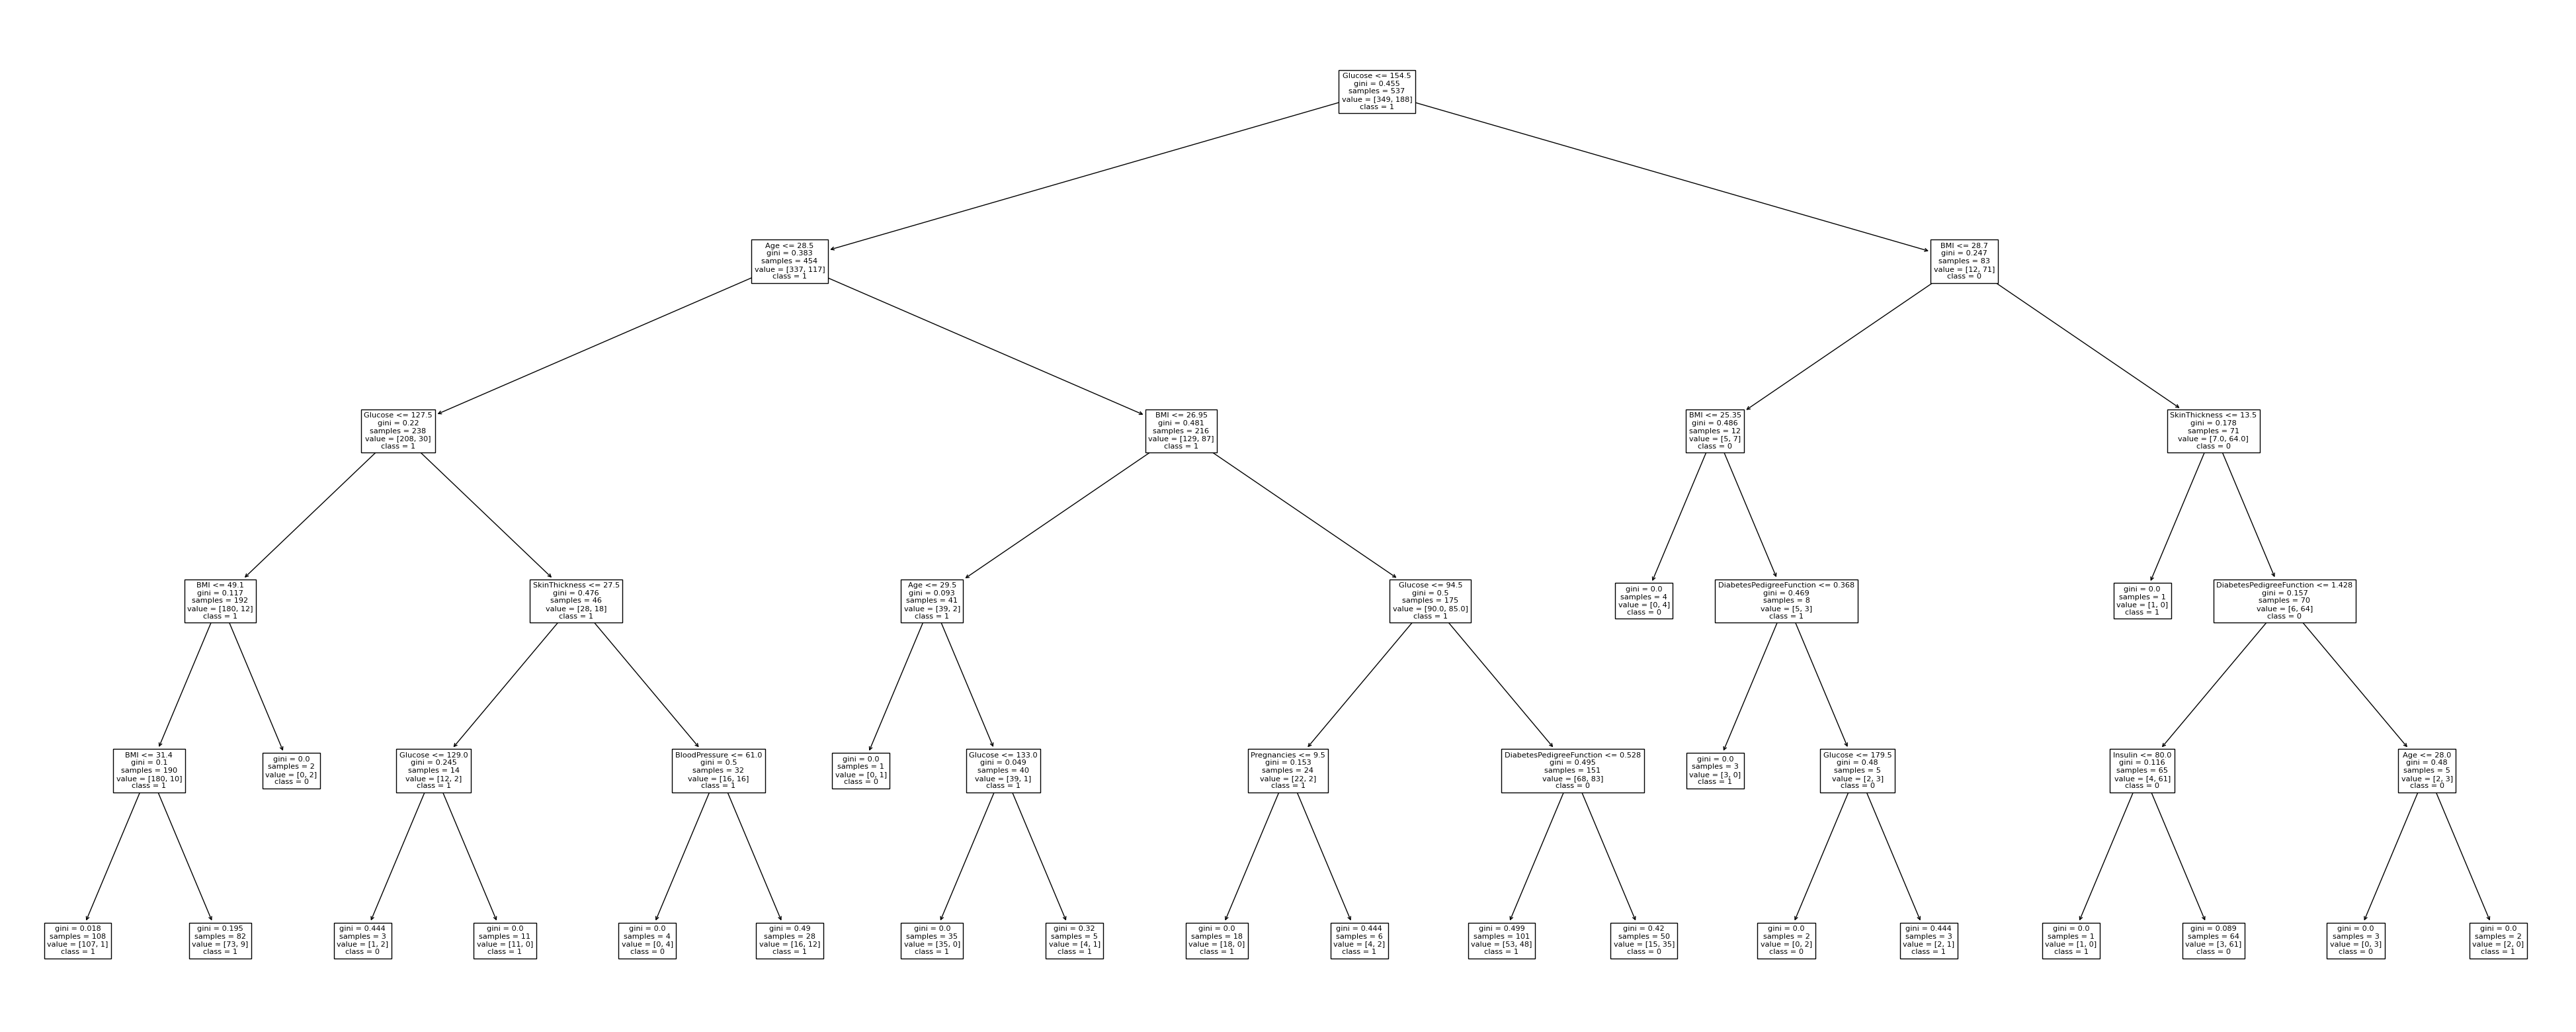

In [305]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50,20))

a = tree.plot_tree (
    diabetes_clf, 
    feature_names = feature_names, 
    class_names=[str(cls) for cls in y.unique()]
)

plt.show()


In [306]:
y_pred = diabetes_clf.predict(X_test)


In [307]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 73.59%
